## Using the Lightweight CFFI Wrapper

This notebook inlcudes a few examples how to use the darshan-utils bindings for python.

In [1]:
logname = "example.darshan"
logname = "_2k_248.darshan"


In [2]:
import darshan.backend.cffi_backend as backend

dlopen ok


In [3]:
log = backend.log_open(logname)

b'_2k_248.darshan'
<cdata 'void *' 0x560175df7a40>
{'handle': <cdata 'void *' 0x560175df7a40>, 'modules': None, 'name_records': None}


In [4]:
print(log)

{'handle': <cdata 'void *' 0x55914f3fba40>, 'modules': None, 'name_records': None}


In [6]:
backend.log_get_job(log)

{'uid': 69615,
 'start_time': 1490000867,
 'end_time': 1490000983,
 'nprocs': 2048,
 'jobid': 4478544,
 'metadata': {'lib_ver': '3.1.3', 'h': 'romio_no_indep_rw=true;cb_nodes=4'}}

{'handle': <cdata 'void *' NULL>, 'modules': None, 'name_records': None}

In [4]:
backend.log_get_mounts(log)

[('/.shared/base/default/etc/dat.conf', 'dvs'),
 ('/usr/lib64/libibverbs.so.1.0.0', 'dvs'),
 ('/usr/lib64/libibumad.so.3.0.2', 'dvs'),
 ('/usr/lib64/librdmacm.so.1.0.0', 'dvs'),
 ('/usr/lib64/libibgni.so.1.0.0', 'dvs'),
 ('/global/cscratch1', 'lustre'),
 ('/global/projectb', 'dvs'),
 ('/global/projecta', 'dvs'),
 ('/usr/sbin/ibstat', 'dvs'),
 ('/global/project', 'dvs'),
 ('/global/common', 'dvs'),
 ('/global/syscom', 'dvs'),
 ('/global/dna', 'dvs'),
 ('/opt/slurm', 'dvs'),
 ('/global/u1', 'dvs'),
 ('/global/u2', 'dvs'),
 ('/scratch1', 'lustre'),
 ('/scratch2', 'lustre'),
 ('/scratch3', 'lustre'),
 ('/etc', 'dvs'),
 ('/', 'rootfs'),
 ('/', 'dvs')]

In [5]:
backend.log_get_modules(log)

{'POSIX': {'len': 186, 'ver': 3, 'idx': 1},
 'MPI-IO': {'len': 154, 'ver': 2, 'idx': 2},
 'LUSTRE': {'len': 87, 'ver': 1, 'idx': 6},
 'STDIO': {'len': 3234, 'ver': 1, 'idx': 7}}

### Exploring Available Counters

Each Darshan module comes with it's own counters which can be easily listed using the `counter_names()` and `counterf_names()` functions.

In [6]:
backend.counter_names("posix")
# also note f counters: darshan.fcounter_names("posix")

['POSIX_OPENS',
 'POSIX_FILENOS',
 'POSIX_DUPS',
 'POSIX_READS',
 'POSIX_WRITES',
 'POSIX_SEEKS',
 'POSIX_STATS',
 'POSIX_MMAPS',
 'POSIX_FSYNCS',
 'POSIX_FDSYNCS',
 'POSIX_RENAME_SOURCES',
 'POSIX_RENAME_TARGETS',
 'POSIX_RENAMED_FROM',
 'POSIX_MODE',
 'POSIX_BYTES_READ',
 'POSIX_BYTES_WRITTEN',
 'POSIX_MAX_BYTE_READ',
 'POSIX_MAX_BYTE_WRITTEN',
 'POSIX_CONSEC_READS',
 'POSIX_CONSEC_WRITES',
 'POSIX_SEQ_READS',
 'POSIX_SEQ_WRITES',
 'POSIX_RW_SWITCHES',
 'POSIX_MEM_NOT_ALIGNED',
 'POSIX_MEM_ALIGNMENT',
 'POSIX_FILE_NOT_ALIGNED',
 'POSIX_FILE_ALIGNMENT',
 'POSIX_MAX_READ_TIME_SIZE',
 'POSIX_MAX_WRITE_TIME_SIZE',
 'POSIX_SIZE_READ_0_100',
 'POSIX_SIZE_READ_100_1K',
 'POSIX_SIZE_READ_1K_10K',
 'POSIX_SIZE_READ_10K_100K',
 'POSIX_SIZE_READ_100K_1M',
 'POSIX_SIZE_READ_1M_4M',
 'POSIX_SIZE_READ_4M_10M',
 'POSIX_SIZE_READ_10M_100M',
 'POSIX_SIZE_READ_100M_1G',
 'POSIX_SIZE_READ_1G_PLUS',
 'POSIX_SIZE_WRITE_0_100',
 'POSIX_SIZE_WRITE_100_1K',
 'POSIX_SIZE_WRITE_1K_10K',
 'POSIX_SIZE_WRITE_10K

In [7]:
backend.counter_names("mpiio")
# also note f counters: darshan.fcounter_names("mpiio")

['MPIIO_INDEP_OPENS',
 'MPIIO_COLL_OPENS',
 'MPIIO_INDEP_READS',
 'MPIIO_INDEP_WRITES',
 'MPIIO_COLL_READS',
 'MPIIO_COLL_WRITES',
 'MPIIO_SPLIT_READS',
 'MPIIO_SPLIT_WRITES',
 'MPIIO_NB_READS',
 'MPIIO_NB_WRITES',
 'MPIIO_SYNCS',
 'MPIIO_HINTS',
 'MPIIO_VIEWS',
 'MPIIO_MODE',
 'MPIIO_BYTES_READ',
 'MPIIO_BYTES_WRITTEN',
 'MPIIO_RW_SWITCHES',
 'MPIIO_MAX_READ_TIME_SIZE',
 'MPIIO_MAX_WRITE_TIME_SIZE',
 'MPIIO_SIZE_READ_AGG_0_100',
 'MPIIO_SIZE_READ_AGG_100_1K',
 'MPIIO_SIZE_READ_AGG_1K_10K',
 'MPIIO_SIZE_READ_AGG_10K_100K',
 'MPIIO_SIZE_READ_AGG_100K_1M',
 'MPIIO_SIZE_READ_AGG_1M_4M',
 'MPIIO_SIZE_READ_AGG_4M_10M',
 'MPIIO_SIZE_READ_AGG_10M_100M',
 'MPIIO_SIZE_READ_AGG_100M_1G',
 'MPIIO_SIZE_READ_AGG_1G_PLUS',
 'MPIIO_SIZE_WRITE_AGG_0_100',
 'MPIIO_SIZE_WRITE_AGG_100_1K',
 'MPIIO_SIZE_WRITE_AGG_1K_10K',
 'MPIIO_SIZE_WRITE_AGG_10K_100K',
 'MPIIO_SIZE_WRITE_AGG_100K_1M',
 'MPIIO_SIZE_WRITE_AGG_1M_4M',
 'MPIIO_SIZE_WRITE_AGG_4M_10M',
 'MPIIO_SIZE_WRITE_AGG_10M_100M',
 'MPIIO_SIZE_WRITE_AGG

In [8]:
backend.counter_names("stdio")
# also note f counters: darshan.fcounter_names("stdio")

['STDIO_OPENS',
 'STDIO_FDOPENS',
 'STDIO_READS',
 'STDIO_WRITES',
 'STDIO_SEEKS',
 'STDIO_FLUSHES',
 'STDIO_BYTES_WRITTEN',
 'STDIO_BYTES_READ',
 'STDIO_MAX_BYTE_READ',
 'STDIO_MAX_BYTE_WRITTEN',
 'STDIO_FASTEST_RANK',
 'STDIO_FASTEST_RANK_BYTES',
 'STDIO_SLOWEST_RANK',
 'STDIO_SLOWEST_RANK_BYTES']

In [9]:
posix_record = backend.log_get_posix_record(log)
posix_record

{'id': 6301063301082038805,
 'rank': -1,
 'counters': array([                2049, 18446744073709551615, 18446744073709551615,
                           0,                16402,                16404,
                           0,                    0,                    0,
                           0, 18446744073709551615, 18446744073709551615,
                           0,                    0,                    0,
               2199023259968,                    0,        2199023261831,
                           0,                    0,                    0,
                       16384,                    0,                    0,
                           8,                16401,              1048576,
                           0,            134217728,                    0,
                           0,                    0,                    0,
                           0,                    0,                    0,
                           0,                    0,        

In [10]:
# access a single field
posix_record['counters'][backend.counter_names("POSIX").index('POSIX_WRITES')]

16402

In [11]:
dict(zip(backend.counter_names("POSIX"), posix_record['counters']))

{'POSIX_OPENS': 2049,
 'POSIX_FILENOS': 18446744073709551615,
 'POSIX_DUPS': 18446744073709551615,
 'POSIX_READS': 0,
 'POSIX_WRITES': 16402,
 'POSIX_SEEKS': 16404,
 'POSIX_STATS': 0,
 'POSIX_MMAPS': 0,
 'POSIX_FSYNCS': 0,
 'POSIX_FDSYNCS': 0,
 'POSIX_RENAME_SOURCES': 18446744073709551615,
 'POSIX_RENAME_TARGETS': 18446744073709551615,
 'POSIX_RENAMED_FROM': 0,
 'POSIX_MODE': 0,
 'POSIX_BYTES_READ': 0,
 'POSIX_BYTES_WRITTEN': 2199023259968,
 'POSIX_MAX_BYTE_READ': 0,
 'POSIX_MAX_BYTE_WRITTEN': 2199023261831,
 'POSIX_CONSEC_READS': 0,
 'POSIX_CONSEC_WRITES': 0,
 'POSIX_SEQ_READS': 0,
 'POSIX_SEQ_WRITES': 16384,
 'POSIX_RW_SWITCHES': 0,
 'POSIX_MEM_NOT_ALIGNED': 0,
 'POSIX_MEM_ALIGNMENT': 8,
 'POSIX_FILE_NOT_ALIGNED': 16401,
 'POSIX_FILE_ALIGNMENT': 1048576,
 'POSIX_MAX_READ_TIME_SIZE': 0,
 'POSIX_MAX_WRITE_TIME_SIZE': 134217728,
 'POSIX_SIZE_READ_0_100': 0,
 'POSIX_SIZE_READ_100_1K': 0,
 'POSIX_SIZE_READ_1K_10K': 0,
 'POSIX_SIZE_READ_10K_100K': 0,
 'POSIX_SIZE_READ_100K_1M': 0,
 'POSIX_

## Plotting

In addition to darshan log access, a number of functions to generate plots commonly found in darshan reports are provided in the plots submodule. To render a plot import from `darshan.plots` and generate the desired chart as follows:

In [12]:
%matplotlib inline

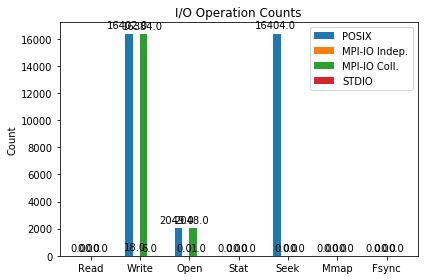

In [2]:
# OP COUNTS
import darshan.backend.cffi_backend as backend
log = backend.log_open("sample.darshan")

from darshan.experimental.plots.matplotlib import plot_opcounts
plot_opcounts(log)

log: {'handle': <cdata 'void *' 0x55a4082c6df0>, 'modules': None, 'name_records': None}
filter: posix
data: None


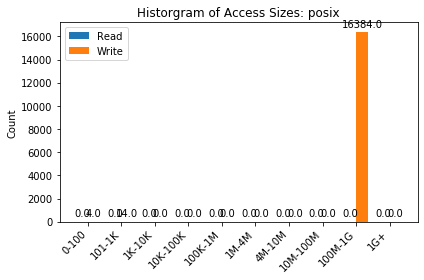

In [5]:
# HIST POSIX
import darshan.backend.cffi_backend as backend
log = backend.log_open("example.darshan")

from darshan.experimental.plots.matplotlib import plot_access_histogram
plot_access_histogram(log, filter="posix")

log: {'handle': <cdata 'void *' 0x55e1d917e680>, 'modules': None, 'name_records': None}
filter: mpiio
data: None


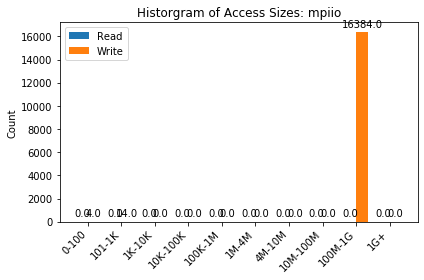

In [15]:
# HIST MPIIO
import darshan.backend.cffi_backend as backend
log = backend.log_open("example.darshan")

from darshan.experimental.plots.matplotlib import plot_access_histogram
plot_access_histogram(log, filter="mpiio")

### Close logs to release resources
Closing log files helps the system to free memory especially when many log files are analysed and memory can become a constraint.

In [17]:
backend.log_close(log)